# Predicting Tennis Match Outcomes

### INTRODUCTION 

**Background:**  

Having originated in the 12th century in Europe, tennis is now popularly played competitively and recreationally globally. The game, known as a match, involves using rackets to hit a ball across a net in the court between two players or pairs. Points are scored when a player is unable to return the incoming ball across the court or when the ball bounces twice on their side of the court. 

**Research question:**

What would the outcome of a match between two players be based on previous match statistics?

**Data Set:**

Data analysis will be done on the "Game results for Top 500 Players from 2017-2019" data set [1], collected by the Association of Tennis Professionals (ATP). In the data set, each observation is data for a specific match while each variable is a match or player statistic.

Variable definitions: [2] 
- tourney_id = unique identifier for each tournament 
- tourney_name = tournament name
- surface = court surface
- draw_size = total tournament draw size
- tourney_level = tour events
- tourney_date = eight digits (YYYYMMDD) usually the Monday of the tournament week
- match_num = a match-specific identifier
- winner_id/loser_id = player_id of the match winner/loser
- winner_seed/loser_seed = seed of match winner/loser
- winner_entry/loser_entry = 'WC' - wild card, 'Q' - qualifier, 'LL' - lucky loser, 'PR' - protected ranking, 'ITF' - ITF entry
- winner_name/loser_name = name of winner/loser
- winner_hand/loser_hand = dominant hand of winner/loser
- winner_ht/loser_ht = height in cm
- winner_ioc/loser_ioc = 3-character country code
- winner_age/loser_age = age in years
- score = final score
- best_of = '3' or '5' indicating the number of sets for this match
- round = round of tournament
- minutes = match length
- w_ace/l_ace = ace count
- w_df/l_df = double fault counts
- w_svpt/l_svpt = serve points
- w_1stIn/l_1stIn = first serves made
- w_1stWon/l_1stWon = first serve points won
- w_2ndWon/l_2ndWon = second serve points won
- w_SvGms/l_SvGms = service games won
- w_bpSaved/l_bpSaved = break points saved
- w_bpFaced/l_bpFaced = break points faced
- winner_rank/loser_rank = ATP or WTA rank, as of the tourney_date or most recent ranking date before tourney_date
- winner_rank_points/loser_rank_points = number of ranking points

### METHODS AND RESULTS

The variables used for data analysis: (for both winner and loser)
- Country of representation
- Age (years)
- Aces 
- Double fault counts 
- Serve points
- First serves made
- First serve points won
- Second serve points won
- Service games won
- Break points saved
- Break points faced

NOTE: rows in which W/O was found in the score column were filtered out. 

Quantitative match statistics are the focus of our research question, thus all such variables were used for data analysis. Additional variables such as age and country of representation were chosen based on their perceived influence on likelihood to win or lose a match [3], but they don't appear to be relevant in our preliminary analysis.

A K-nearest neighbors classification model will be made to evaluate the outcome of a match between two tennis players using their previous match data with the above variables as predictors. The model will then be tuned with the training data and finally performance will be assessed using the testing data. The results will be visualized by plotting K to show the effect of each predictor on match outcome. 

In [1]:
library(plyr)
library(tidyverse)
library(repr)
library(tidymodels)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()


**Exploring the Data:**

In [2]:
# reading the data frame from a URL link
tennis <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
head(tennis)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


In [3]:
# wrangling and tidying the data
tennis <- filter(tennis, score!= "W/O")
tennis["Index"] <- seq(1, 6823) # "Index" column is added to keep track of matches and therefore players
tennis <- select(tennis, winner_ioc, loser_ioc, winner_age, loser_age, w_ace, w_df, w_svpt, w_1stIn, w_1stWon, 
    w_2ndWon, w_SvGms, w_bpSaved, w_bpFaced, l_ace, l_df, l_svpt, l_1stIn, l_1stWon, l_2ndWon, l_SvGms, 
    l_bpSaved, l_bpFaced)

# seperate the statistics for winning and losing players
tennis_w <- select(tennis, starts_with("w")) 
tennis_w["Outcome"] <- "W"
colnames(tennis_w) = gsub("w_","",colnames(tennis_w))
colnames(tennis_w) = gsub("winner_","",colnames(tennis_w))
tennis_w["Index"] <- seq(1, 6823)

tennis_L <- select(tennis, starts_with("l"))
tennis_L["Outcome"] <- "L"
colnames(tennis_L) = gsub("l_","",colnames(tennis_L))
colnames(tennis_L) = gsub("loser_","",colnames(tennis_L))
tennis_L["Index"] <- seq(1, 6823)

# rejoin the statistics for winning and losing players
tennis <- rbind(tennis_w, tennis_L)

# changing the column names that start with numbers
names(tennis)[6] <- "firstIn"
names(tennis)[7] <- "firstWon"
names(tennis)[8] <- "secondWon"

In [4]:
# split the data set into training and testing sets
tennis_split <- initial_split(tennis, prop = 0.75, strata = Outcome)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 
tennis_train

# the following exploratory data analysis only uses the training set

ioc,age,ace,df,svpt,firstIn,firstWon,secondWon,SvGms,bpSaved,bpFaced,Outcome,Index
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
JPN,29.00479,3,3,77,44,31,17,13,3,6,W,1
RUS,22.88569,10,1,52,33,28,14,10,0,1,W,2
JPN,29.00479,2,2,47,33,26,9,8,2,2,W,3
RUS,22.88569,12,3,105,68,48,25,16,8,8,W,5
FRA,31.88227,10,8,94,58,44,18,16,4,8,W,6
JPN,29.00479,5,2,59,47,37,9,12,0,1,W,7
FRA,33.70568,11,3,64,37,30,11,10,4,7,W,8
AUS,19.86858,1,1,49,38,29,8,9,0,0,W,9
RUS,22.88569,16,2,54,34,27,13,10,0,1,W,10


In [5]:
# exploratory data analysis table

means_table <- tennis_train %>%
    select(-ioc, -Outcome, -Index) %>%
    map_df(mean, na.rm = TRUE)
means_table

age,ace,df,svpt,firstIn,firstWon,secondWon,SvGms,bpSaved,bpFaced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27.56839,6.551646,3.105848,81.54604,50.22536,36.05101,15.91843,12.76796,4.128354,6.768943


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


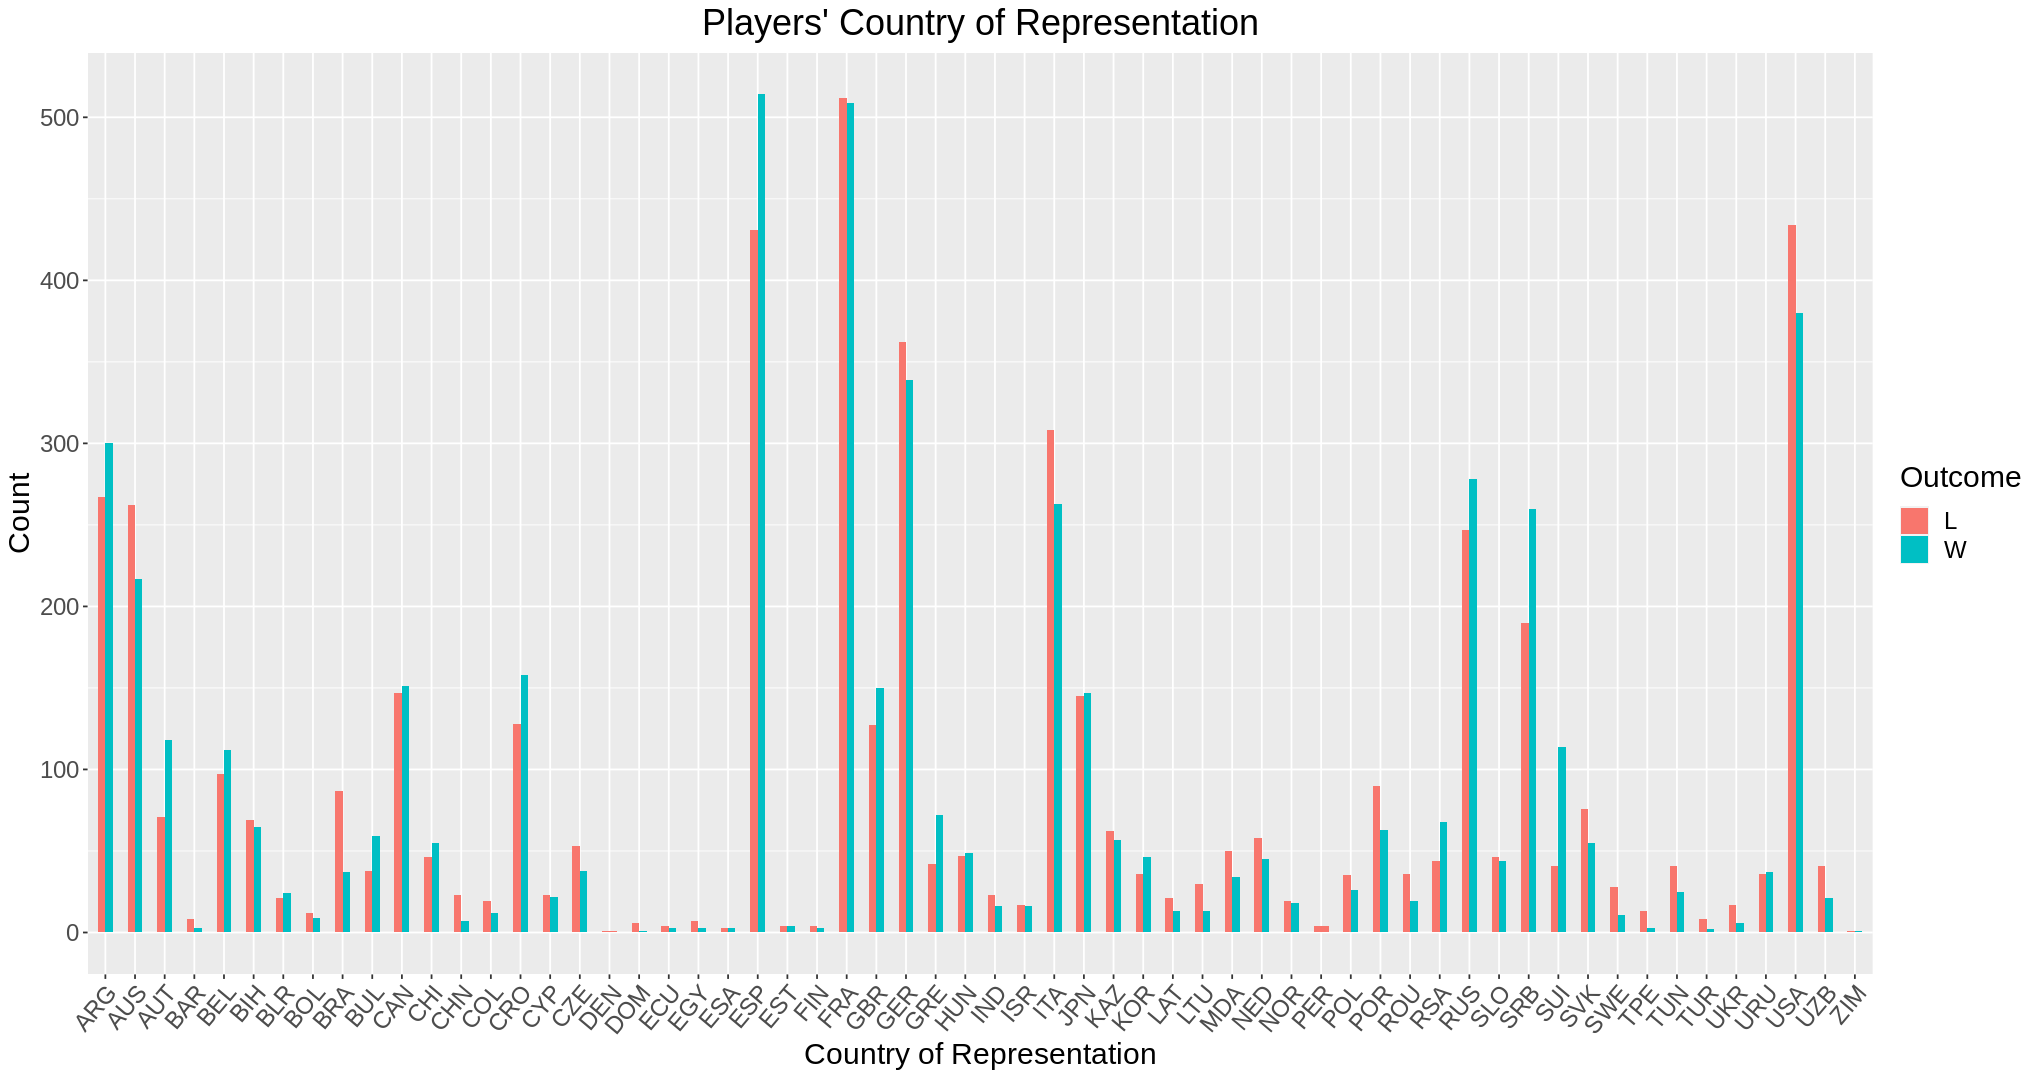

In [6]:
# exploratory data analysis plot 1:

options(repr.plot.width = 17, repr.plot.height = 9) 

ioc_plot <- tennis_train %>% 
   ggplot(aes(x = ioc, fill = Outcome)) + 
   geom_histogram(stat = "count", position = position_dodge(), width = .5) + 
   xlab("Country of Representation") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   theme(axis.text.x = element_text(angle = 50, hjust = 1)) + 
   ggtitle("Players' Country of Representation") +
   theme(plot.title = element_text(hjust = 0.5))
ioc_plot

In [7]:
# INSIGHTS FROM GRAPH

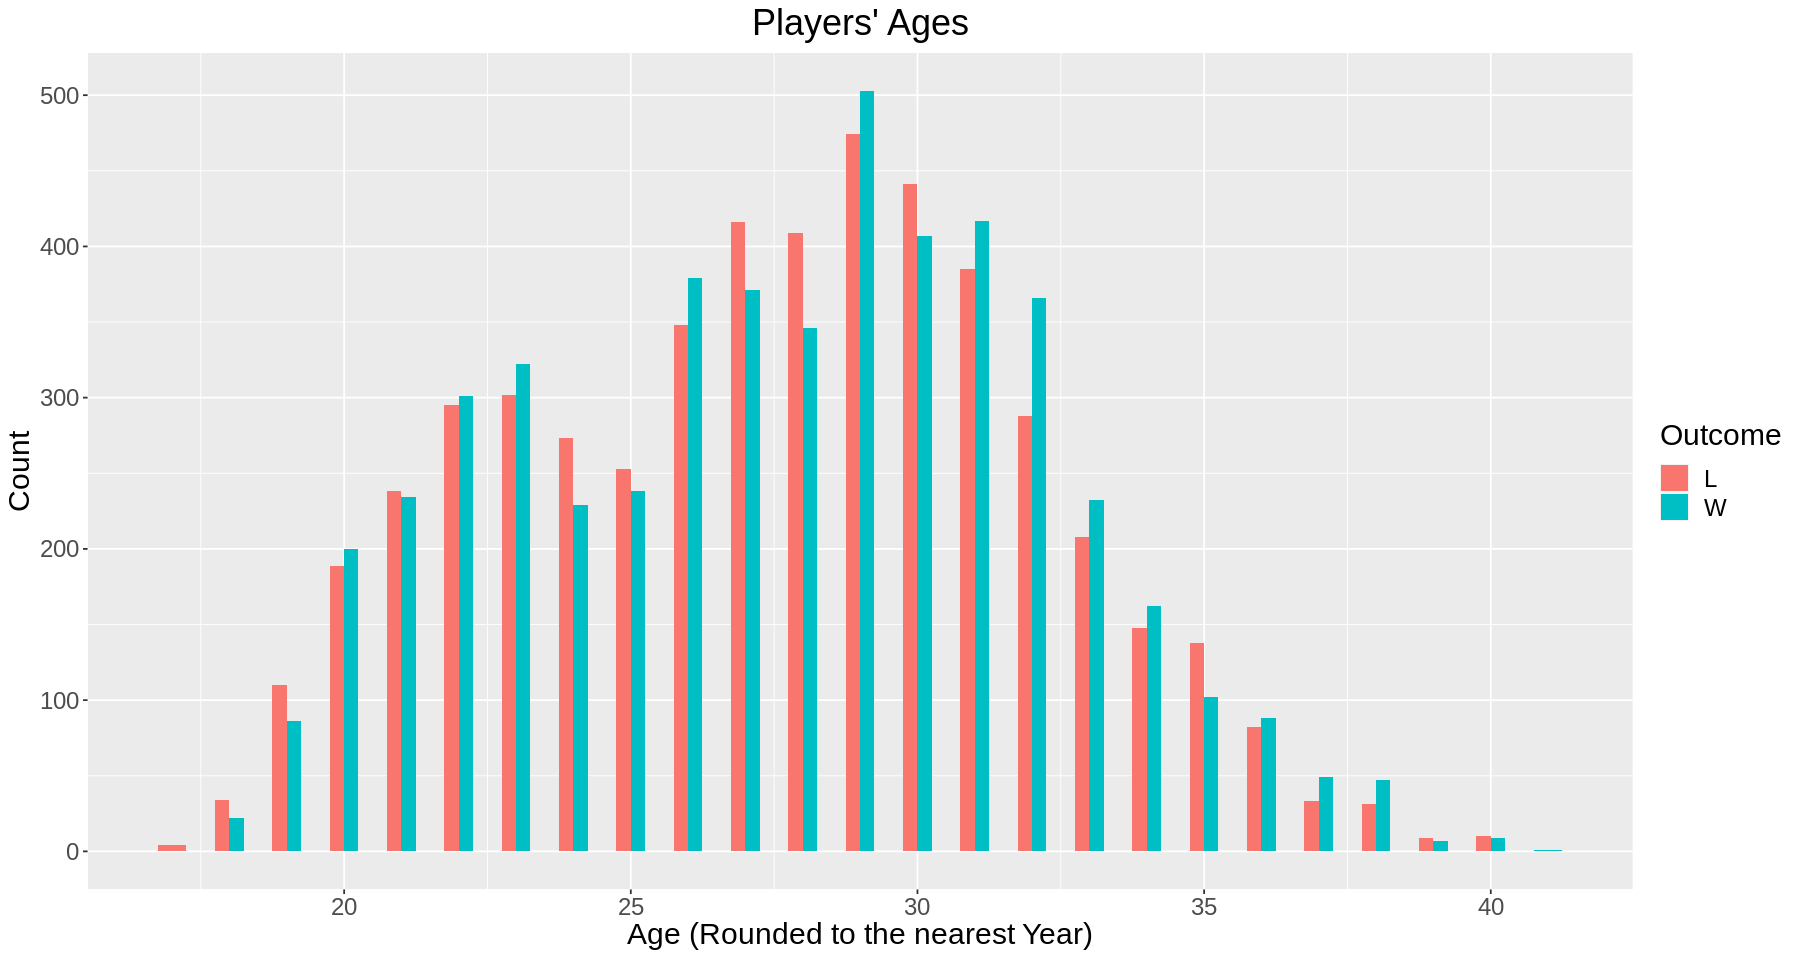

In [8]:
# exploratory data analysis plot 2:

options(repr.plot.width = 15, repr.plot.height = 8) 

age_plot <- tennis_train %>% 
   ggplot(aes(x = round(age), fill = Outcome)) + 
   geom_bar(stat = "count", position = position_dodge(), width = 0.5) + 
   xlab("Age (Rounded to the nearest Year)")+
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   ggtitle("Players' Ages") + 
   theme(plot.title = element_text(hjust = 0.5))
age_plot

In [9]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


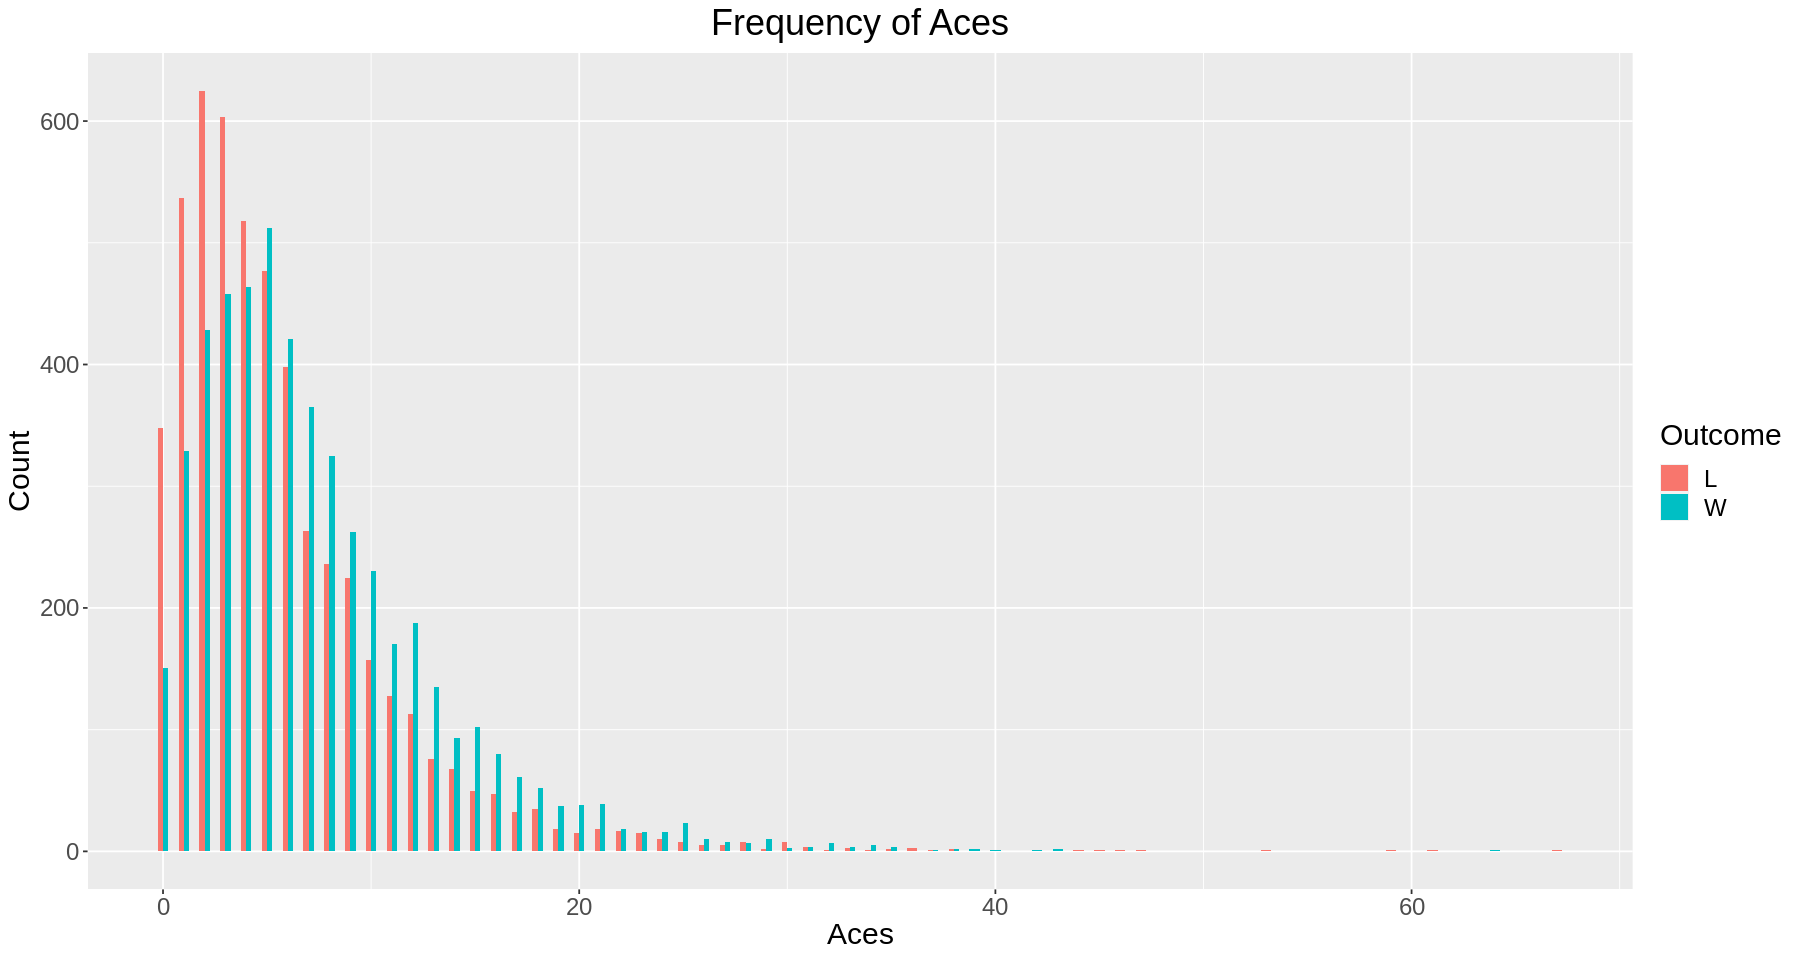

In [10]:
# exploratory data analysis plot 3:

options(repr.plot.width = 15, repr.plot.height = 8) 

ace_plot <- tennis_train %>% 
   ggplot(aes(x = ace, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = 0.5) + 
   xlab("Aces") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   ggtitle("Frequency of Aces") + 
   theme(plot.title = element_text(hjust = 0.5))
ace_plot

In [11]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


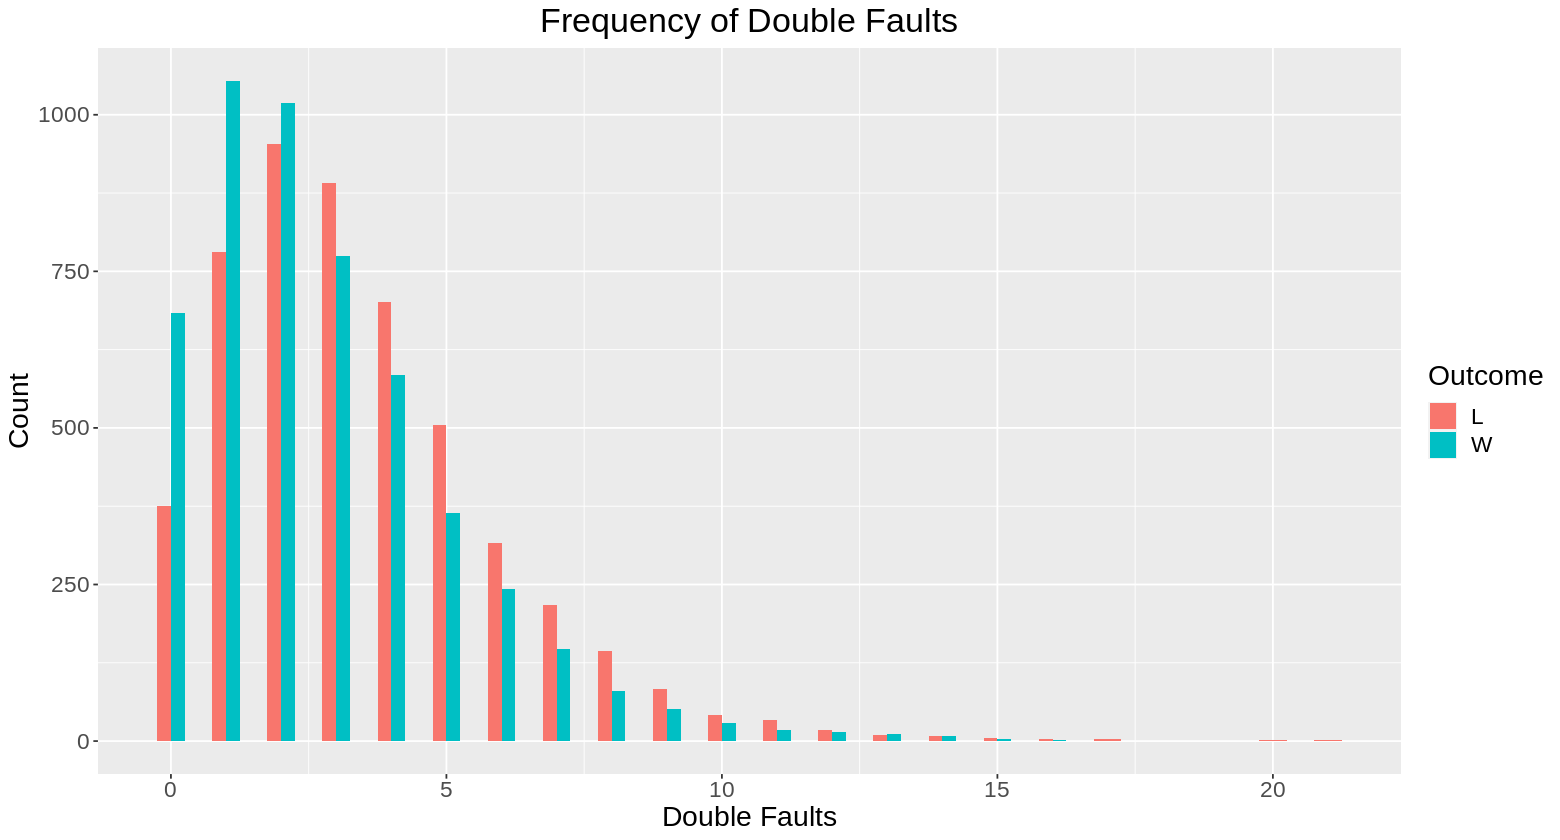

In [12]:
# exploratory data analysis plot 4:

options(repr.plot.width = 13, repr.plot.height = 7) 

df_plot <- tennis_train %>% 
   ggplot(aes(x = df, fill = Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = 0.5) + 
   xlab("Double Faults") +
   ylab("Count") +
   theme(text = element_text(size = 17)) +
   ggtitle("Frequency of Double Faults") + 
   theme(plot.title = element_text(hjust = 0.5))
df_plot

In [13]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


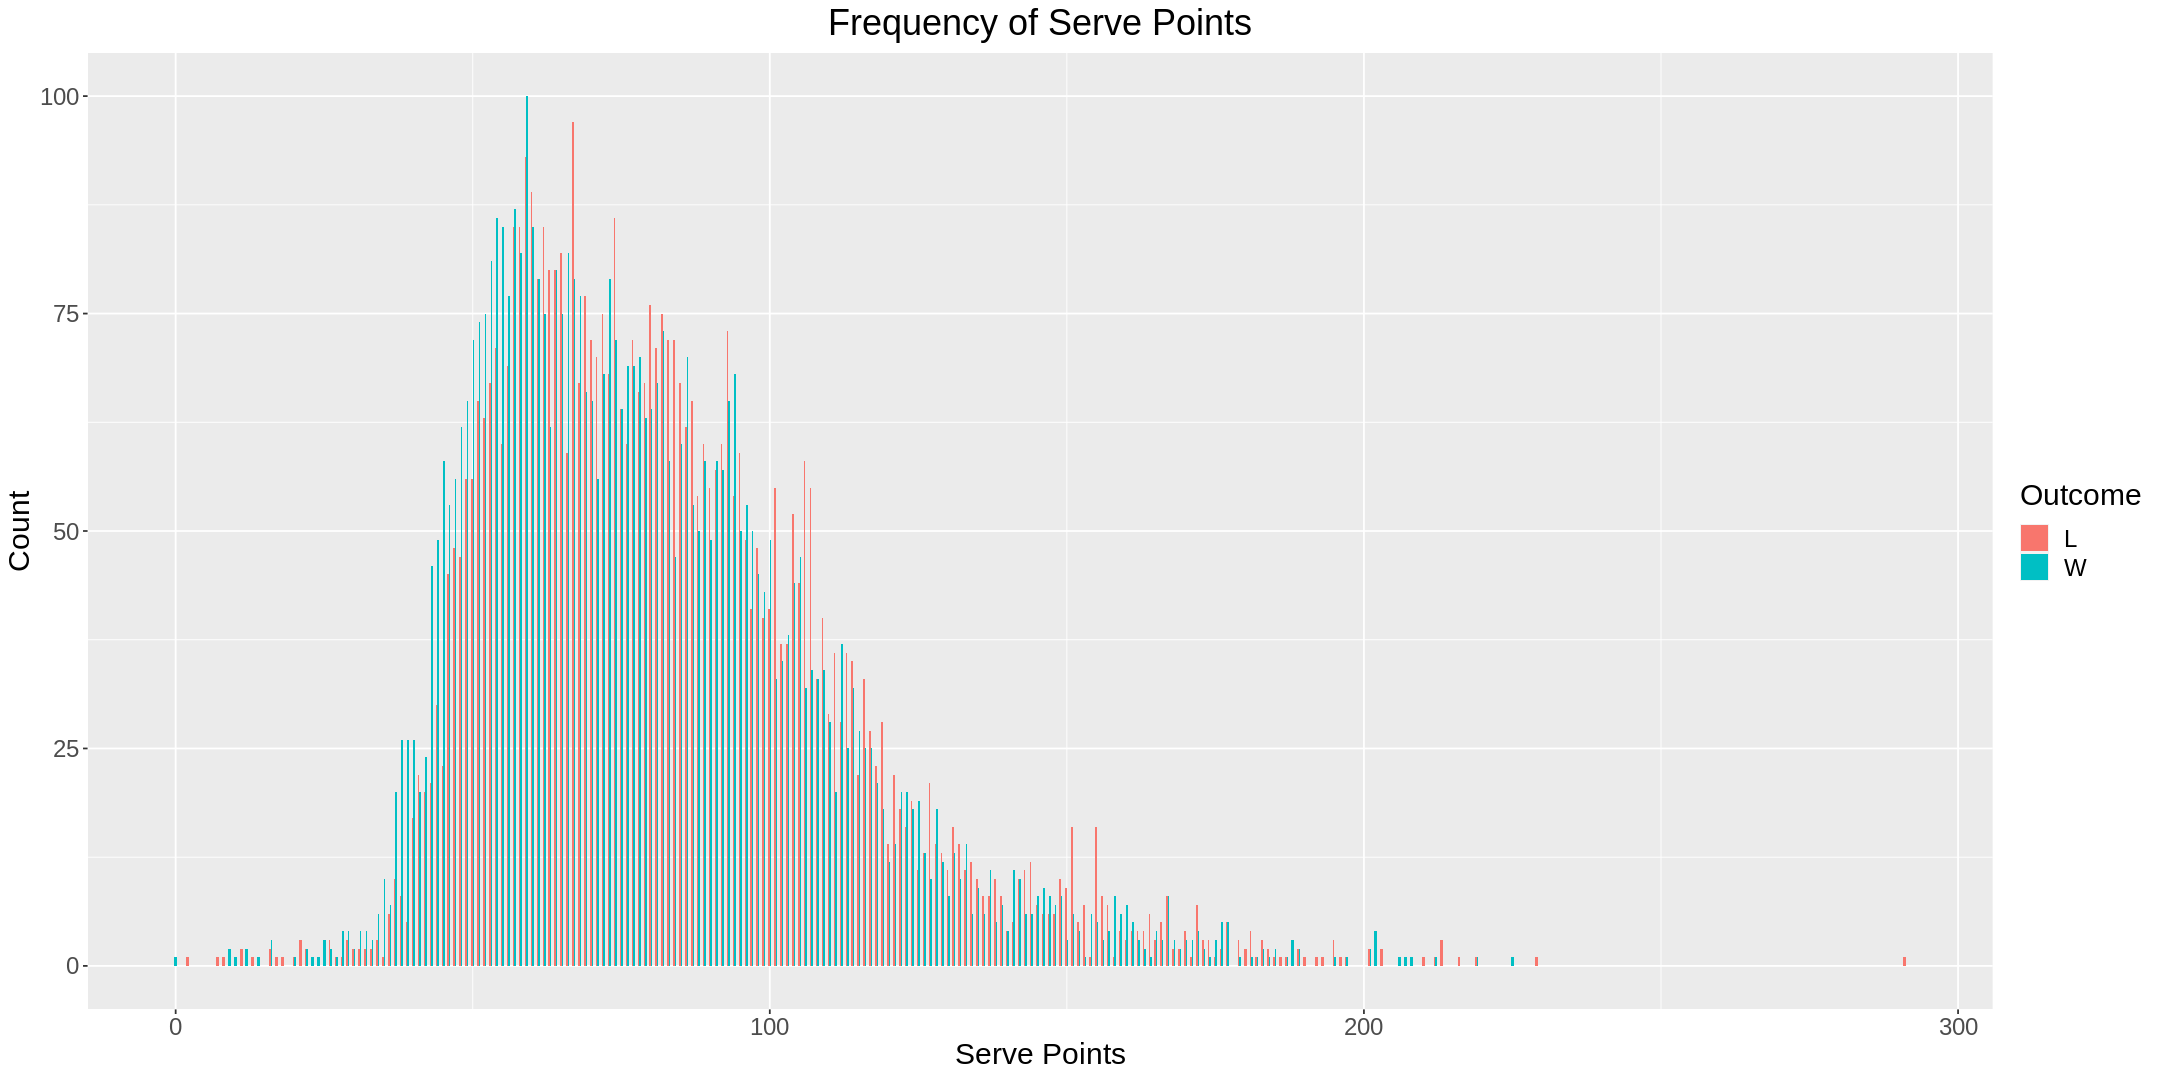

In [14]:
# exploratory data analysis plot 5: 

options(repr.plot.width = 18, repr.plot.height = 9)

svpt_plot <- tennis_train %>% 
   ggplot(aes(x = svpt, fill = Outcome)) + 
   geom_histogram(stat = "count", position = position_dodge(), width = 0.5) + 
   xlab("Serve Points") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   ggtitle("Frequency of Serve Points") + 
   theme(plot.title = element_text(hjust = 0.5))
svpt_plot

In [15]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


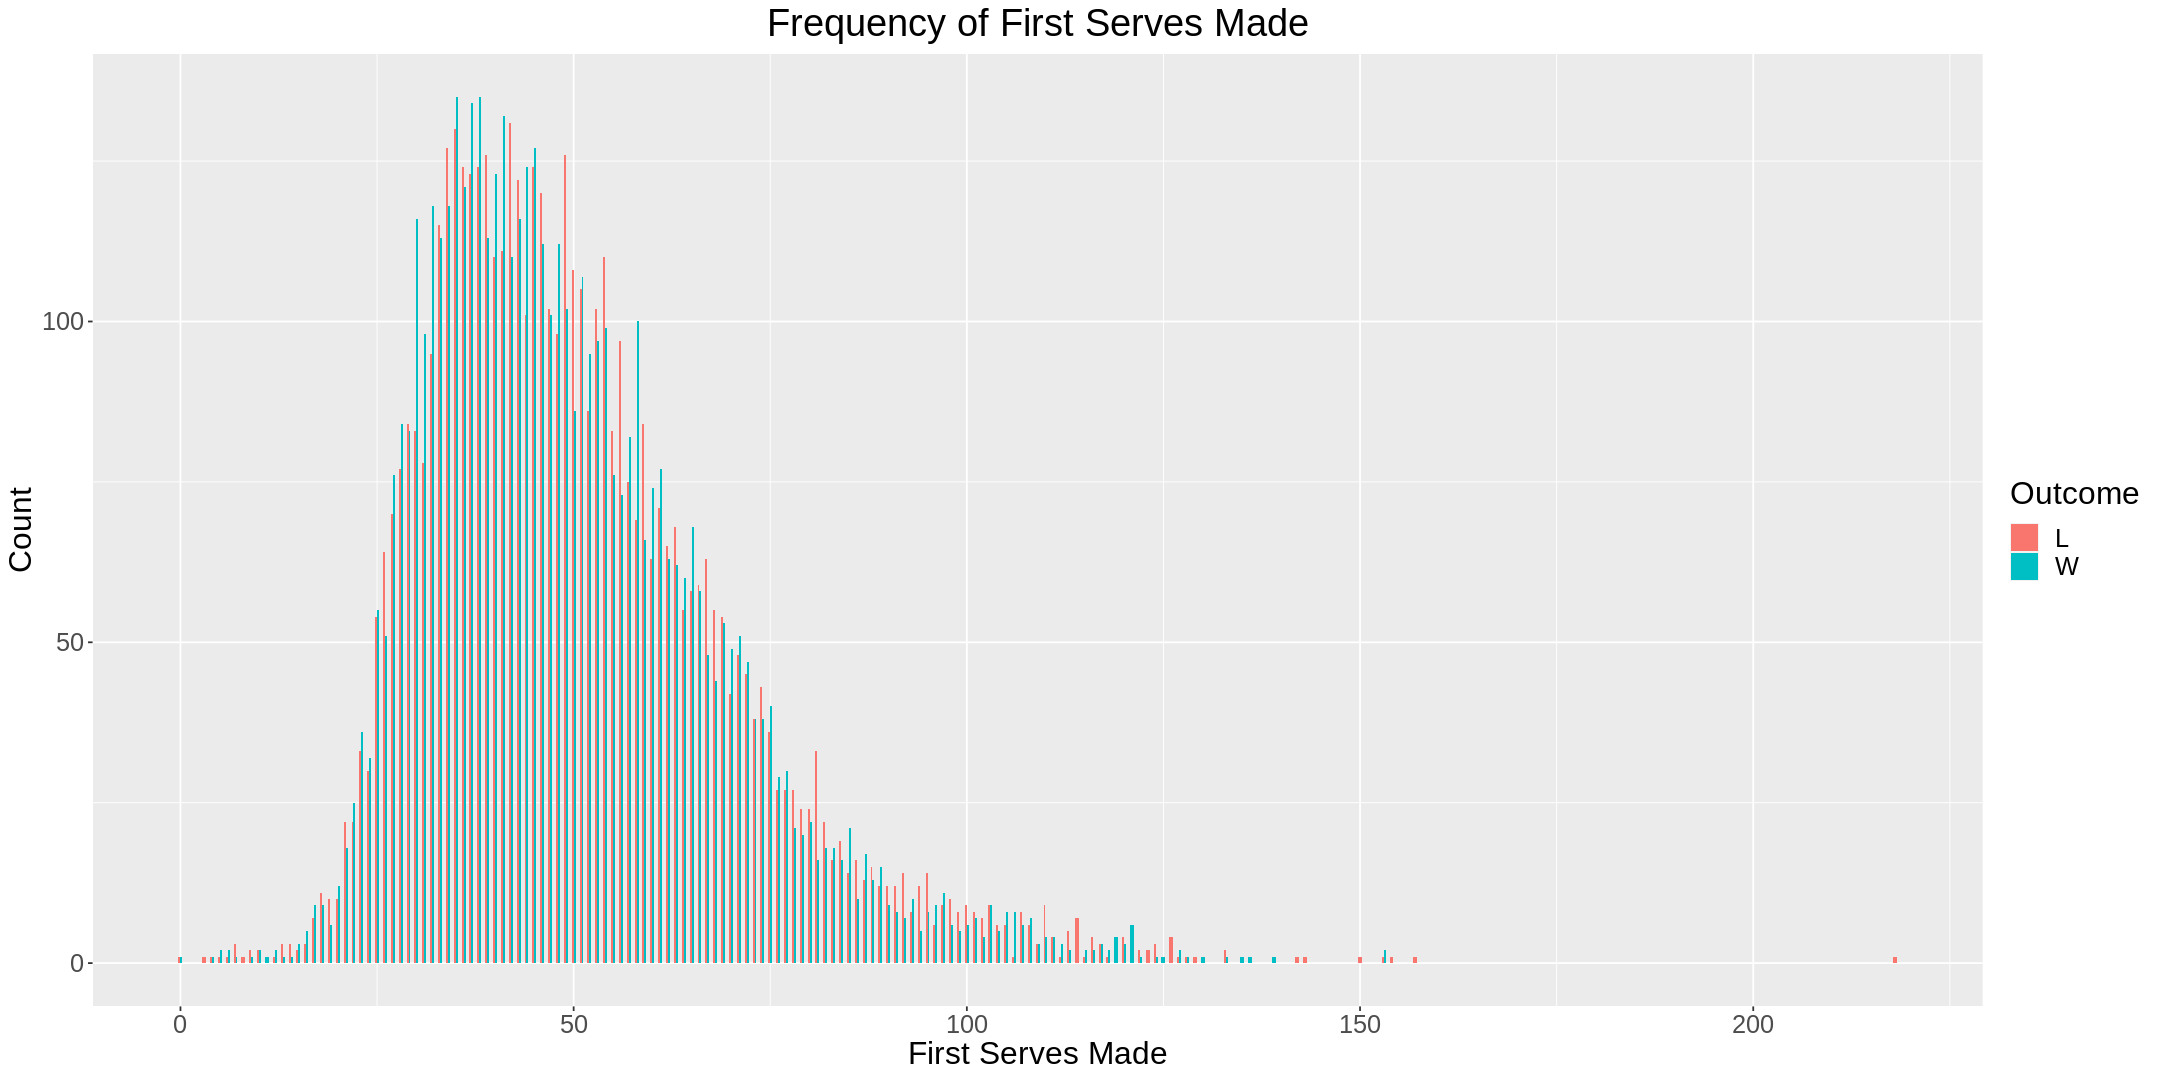

In [16]:
# exploratory data analysis plot 6:

options(repr.plot.width = 18, repr.plot.height = 9)

firstIn_plot <- tennis_train %>% 
   ggplot(aes(x = firstIn, fill=Outcome)) + 
   geom_histogram(stat = "count", position = position_dodge(), width = .5) + 
   xlab("First Serves Made") +
   ylab("Count") +
   theme(text = element_text(size = 19)) +
   ggtitle("Frequency of First Serves Made") + 
   theme(plot.title = element_text(hjust = 0.5))
firstIn_plot

In [17]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


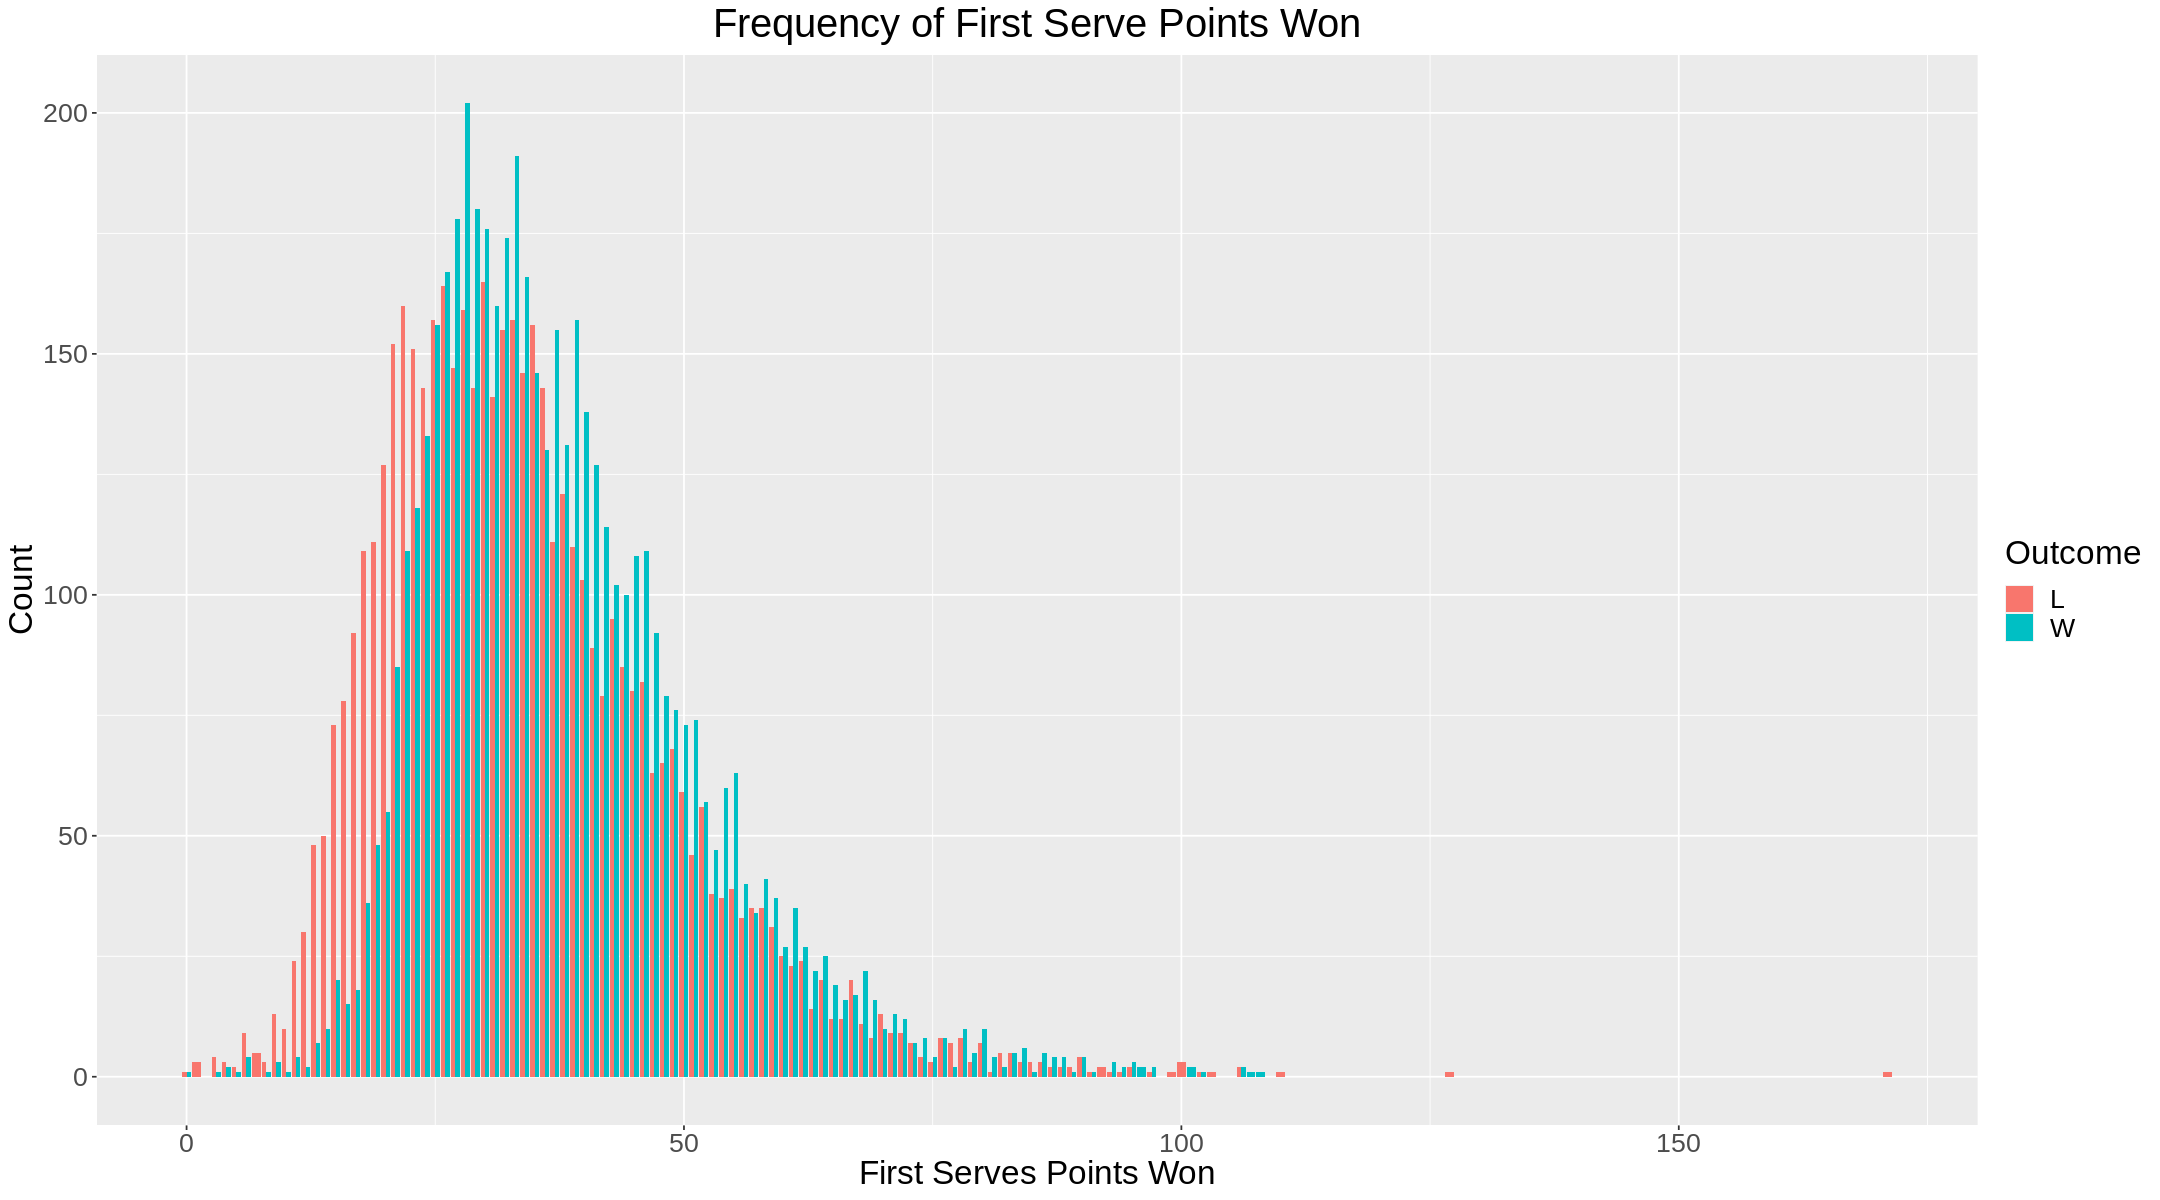

In [18]:
# exploratory data analysis plot 7:

options(repr.plot.width = 18, repr.plot.height = 10)

firstWon_plot <- tennis_train %>% 
   ggplot(aes(x = firstWon, fill = Outcome)) + 
   geom_histogram(stat="count", position = position_dodge()) + 
   xlab("First Serves Points Won") +
   ylab("Count") +
   theme(text = element_text(size = 20)) +
   ggtitle("Frequency of First Serve Points Won") + 
   theme(plot.title = element_text(hjust = 0.5))
firstWon_plot

In [19]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


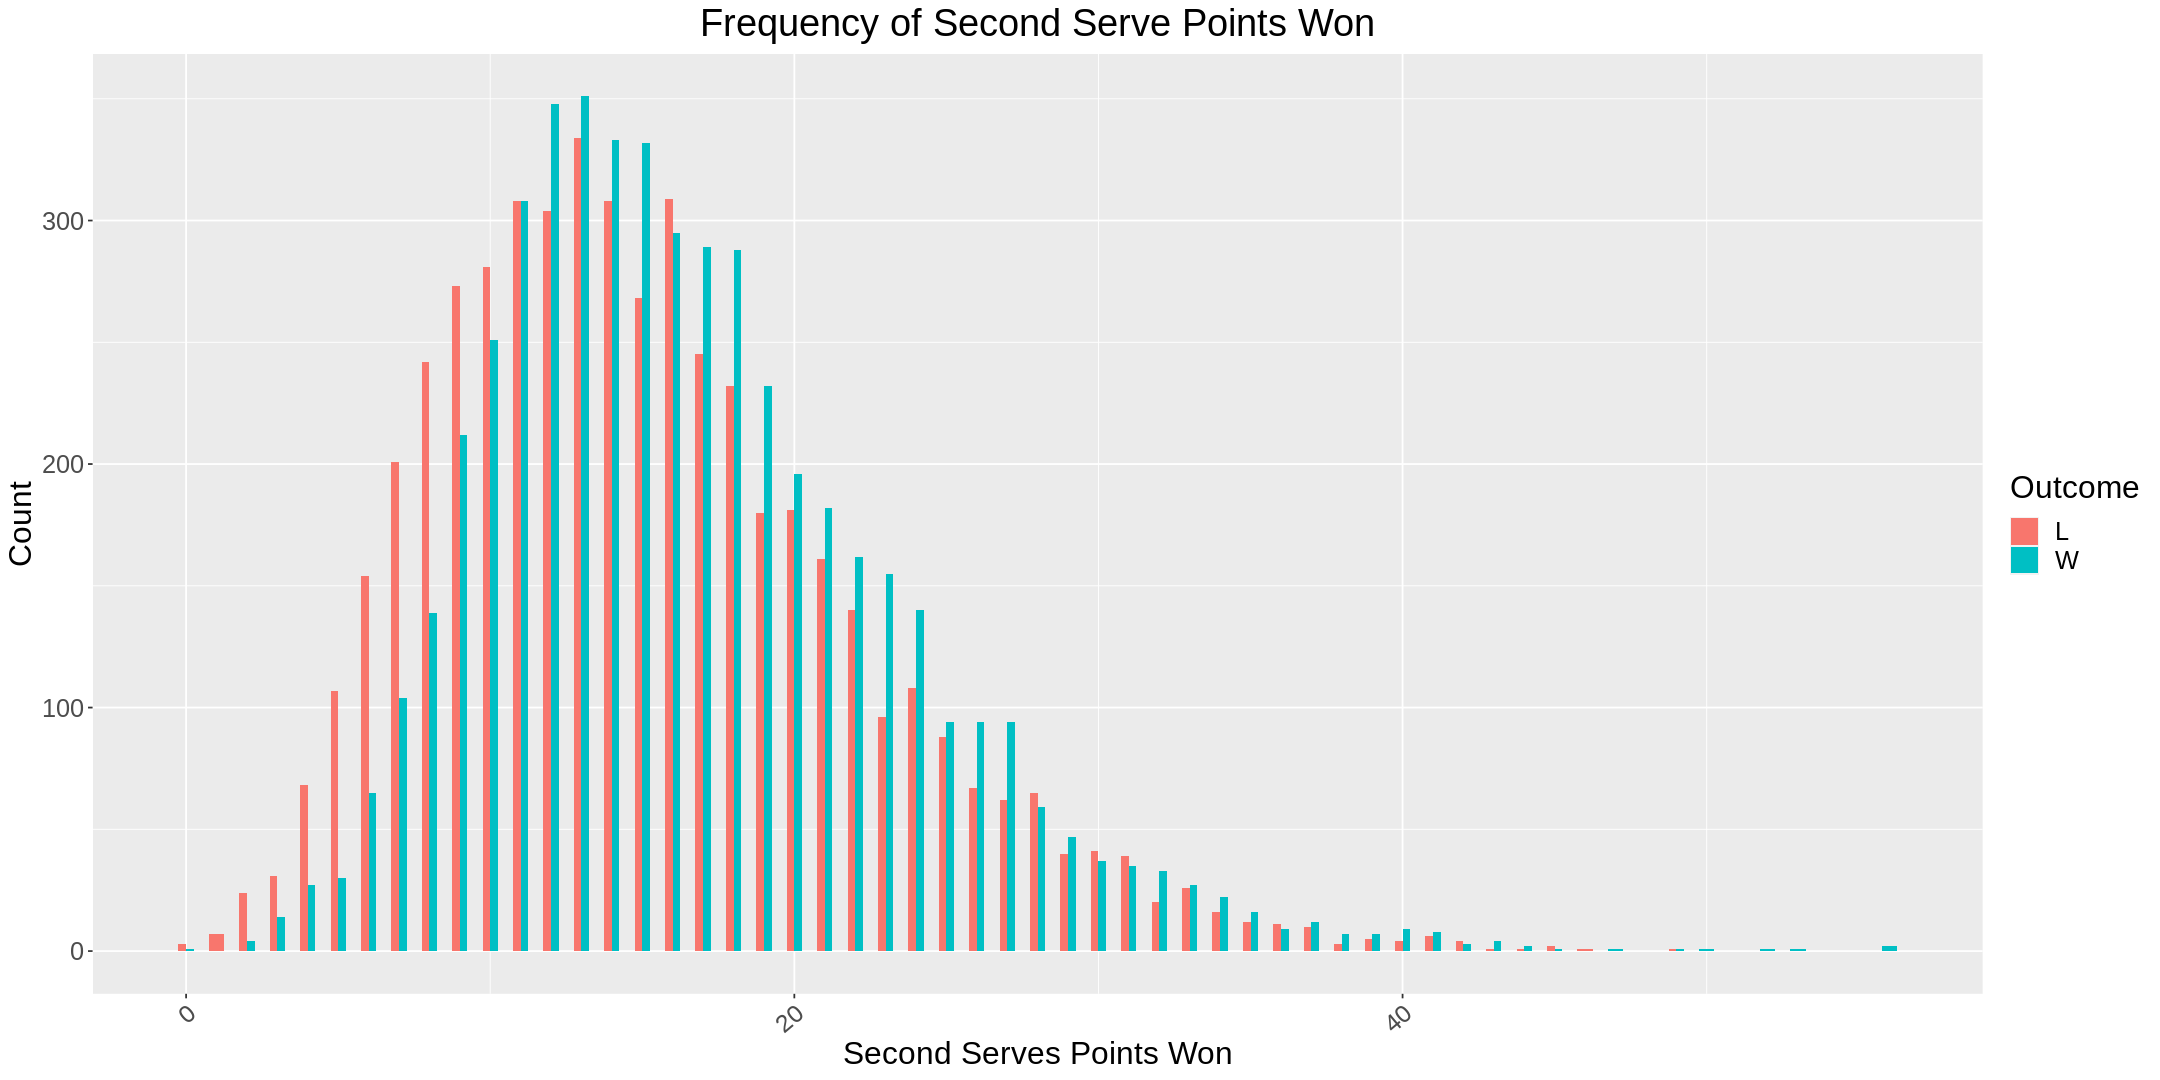

In [20]:
# exploratory data analysis plot 8:

options(repr.plot.width = 18, repr.plot.height = 9)

secondWon_plot <- tennis_train %>% 
   ggplot(aes(x = secondWon, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .5) + 
   xlab("Second Serves Points Won") +
   ylab("Count") +
   theme(text = element_text(size = 19)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Second Serve Points Won") +
   theme(plot.title = element_text(hjust = 0.5))
secondWon_plot

In [21]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


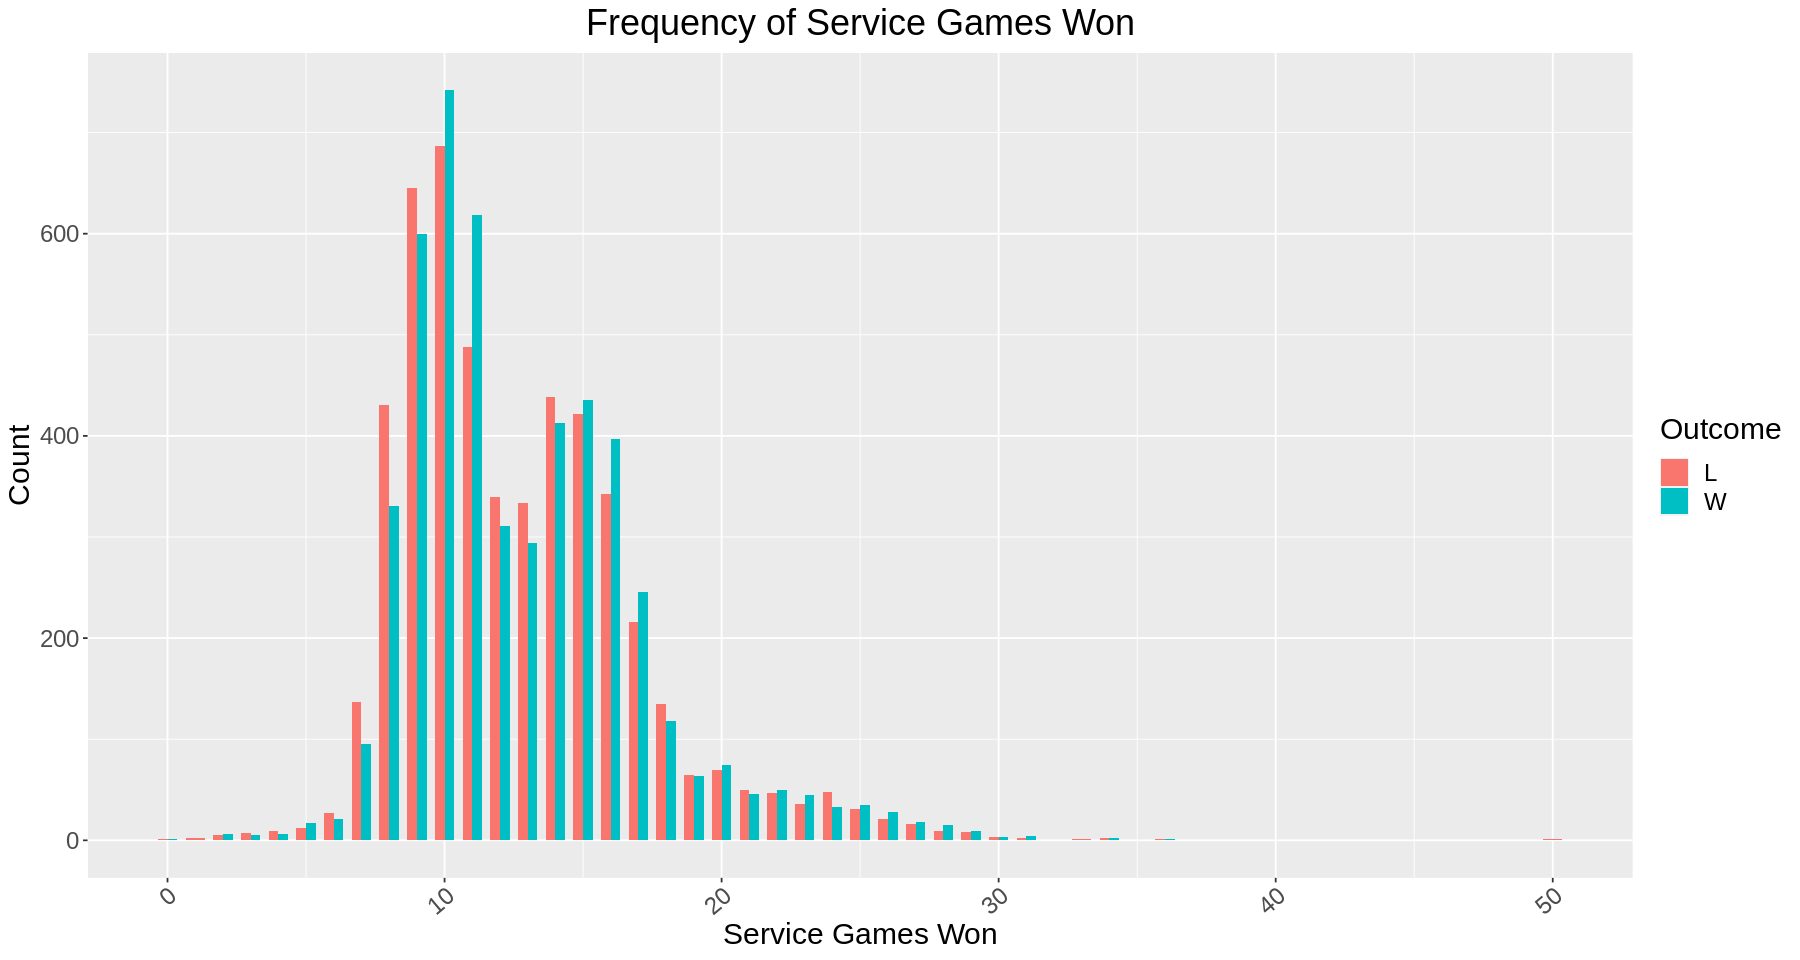

In [22]:
# exploratory data analysis plot 9:

options(repr.plot.width = 15, repr.plot.height = 8)

SvGms_plot <- tennis_train %>% 
   ggplot(aes(x = SvGms, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .7) + 
   xlab("Service Games Won") +
   ylab("Count") +
   theme(text = element_text(size = 18)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Service Games Won") +
   theme(plot.title = element_text(hjust = 0.5))
SvGms_plot

In [23]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


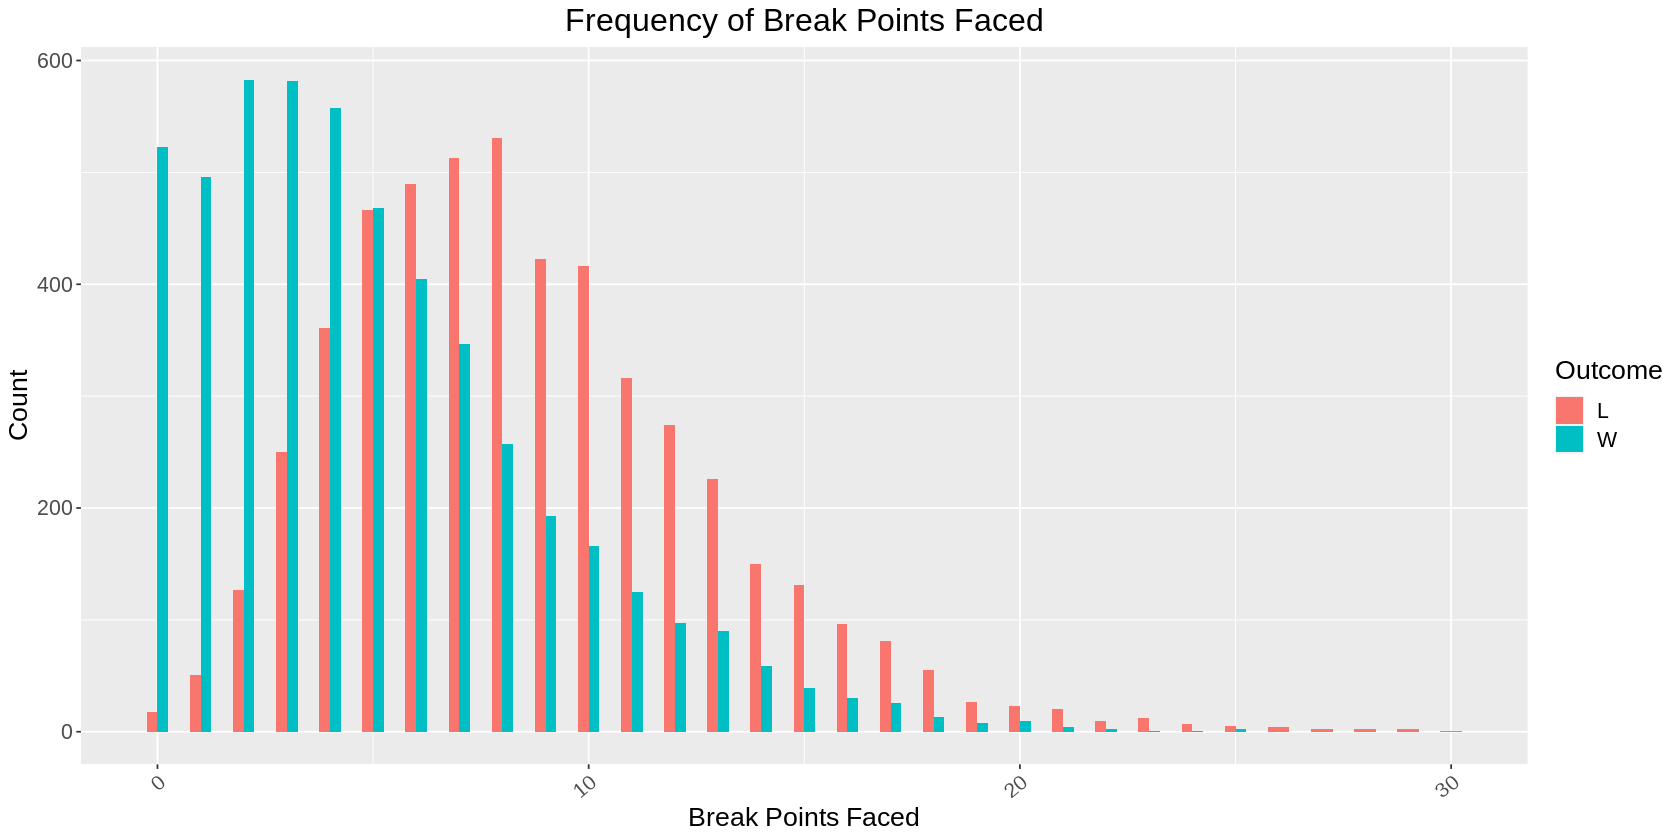

In [24]:
# exploratory data analysis plot 10:

options(repr.plot.width = 14, repr.plot.height = 7)

bpFaced_plot <- tennis_train %>% 
   ggplot(aes(x = bpFaced, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .5) + 
   xlab("Break Points Faced") +
   ylab("Count") +
   theme(text = element_text(size = 16)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Break Points Faced") +
   theme(plot.title = element_text(hjust = 0.5))
bpFaced_plot

In [25]:
# INSIGHTS FROM GRAPH

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 61 rows containing non-finite values (stat_count).”


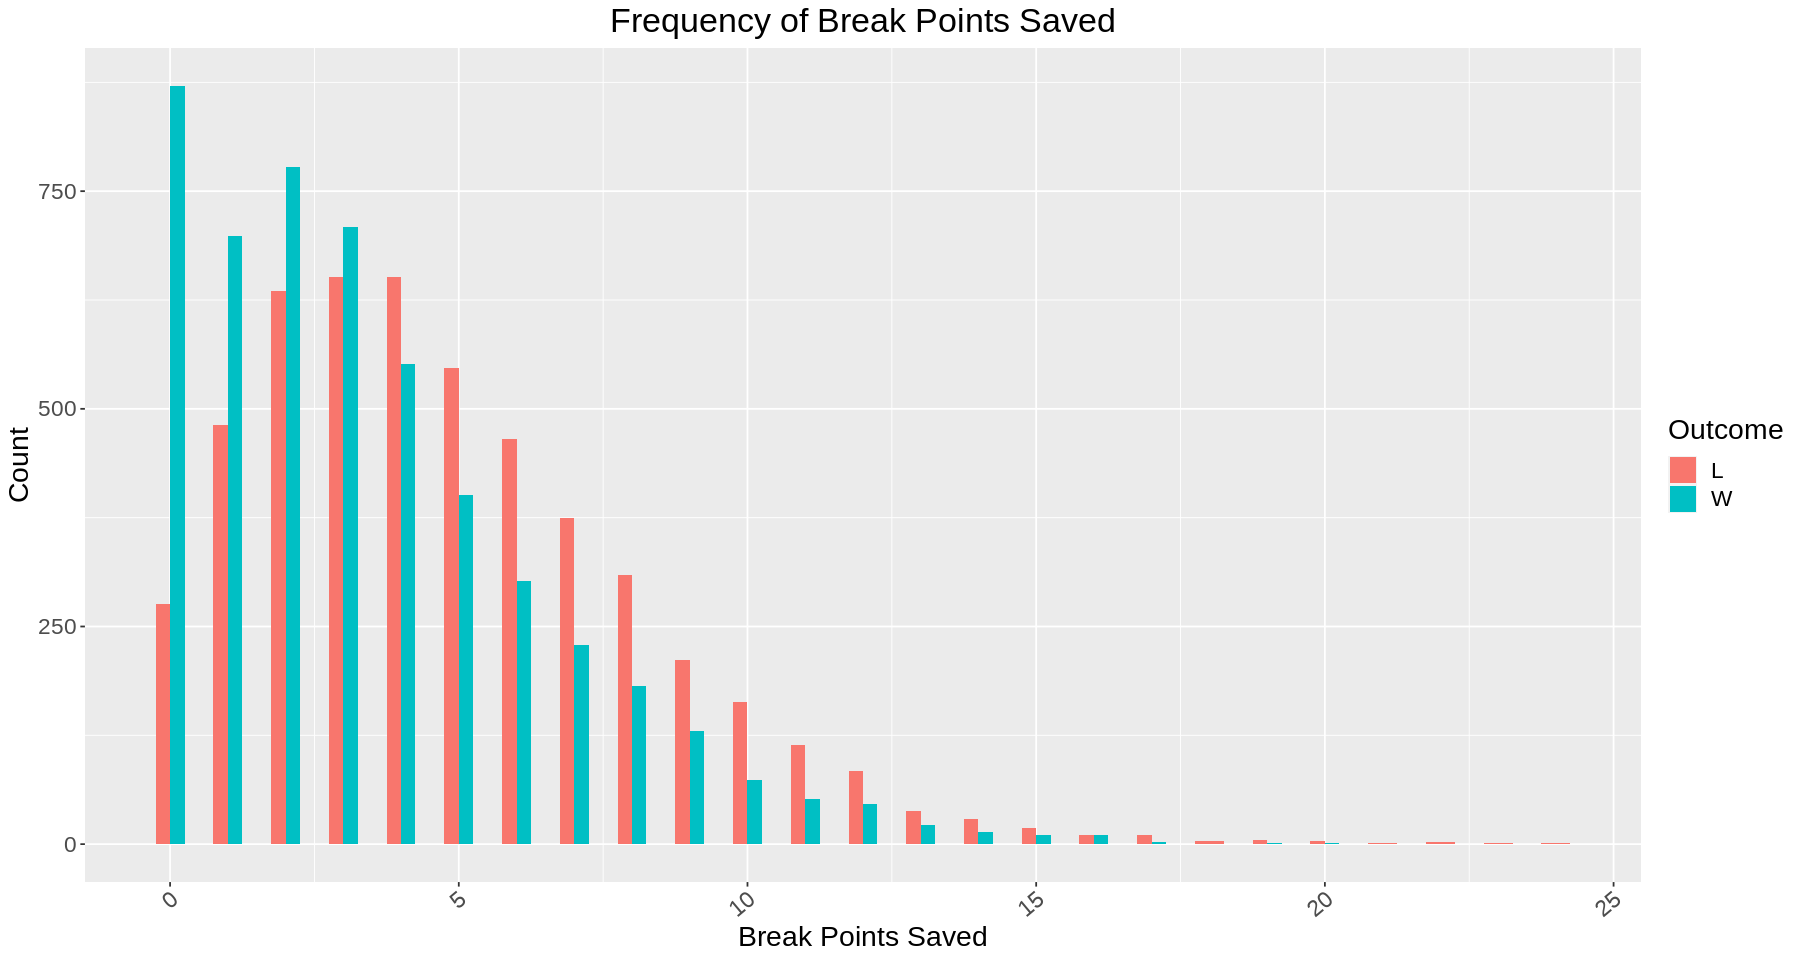

In [26]:
# exploratory data analysis plot 11:

options(repr.plot.width = 15, repr.plot.height = 8)

bpSaved_plot <- tennis_train %>% 
   ggplot(aes(x = bpSaved, fill=Outcome)) + 
   geom_histogram(stat = "count", position=position_dodge(), width = .5) + 
   xlab("Break Points Saved") +
   ylab("Count") +
   theme(text = element_text(size = 17)) +
   theme(axis.text.x = element_text(angle = 40, hjust = 1)) + 
   ggtitle("Frequency of Break Points Saved") +
   theme(plot.title = element_text(hjust = 0.5))
bpSaved_plot

In [27]:
# INSIGHTS FROM GRAPH

**Classification:**

# KNN classification
Note that we will mutate to add percentage columns to reduce variable clutter and generate more meaningful variables
we could've done this easier with the unsplit data set but wanted to keep the preliminary analysis template separate
Variables mutated
-svptwinp-serve point win percentage(df/svpt)
-dfp-double fault percentage(df/svpt)
-bpfacep-breakpoint faced percentage(bpFaced/svpt)
-bpsavedp-breakpoint saved percentage(bpSaved/svpt)
Variable balance is also checked

In [36]:
# Creating new columns
tennis_train_final <- tennis_train %>% 
drop_na()%>%
mutate(svptwinp= (firstWon+secondWon)/svpt,
       dfp= df/svpt,
       bpfacep = bpFaced/svpt,
       bpsavedp = bpSaved/svpt,
       Outcome = as_factor(Outcome))%>% 
select(Outcome:bpsavedp)%>%
select(-Index)
tennis_train_final
tennis_test_final <- tennis_test %>% 
drop_na()%>%
mutate(svptwinp= (firstWon+secondWon)/svpt,
       dfp= df/svpt,
       bpfacep = bpFaced/svpt,
       bpsavedp = bpSaved/svpt,
       Outcome = as_factor(Outcome))%>%
select(Outcome:bpsavedp)%>%
select(-Index)
tennis_test_final
num_obs <- nrow(tennis_train_final)
tennis_train_final %>%
  group_by(Outcome) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )%>%
ungroup()


Outcome,svptwinp,dfp,bpfacep,bpsavedp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
W,0.6233766,0.03896104,0.07792208,0.03896104
W,0.8076923,0.01923077,0.01923077,0.00000000
W,0.7446809,0.04255319,0.04255319,0.04255319
W,0.6952381,0.02857143,0.07619048,0.07619048
W,0.6595745,0.08510638,0.08510638,0.04255319
W,0.7796610,0.03389831,0.01694915,0.00000000
W,0.6406250,0.04687500,0.10937500,0.06250000
W,0.7551020,0.02040816,0.00000000,0.00000000
W,0.7407407,0.03703704,0.01851852,0.00000000


Outcome,svptwinp,dfp,bpfacep,bpsavedp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
W,0.7205882,0.02941176,0.07352941,0.058823529
W,0.7310924,0.02521008,0.01680672,0.008403361
W,0.6530612,0.02040816,0.05102041,0.030612245
W,0.7179487,0.03418803,0.03418803,0.034188034
W,0.7619048,0.04761905,0.00000000,0.000000000
W,0.6779661,0.05084746,0.08474576,0.050847458
W,0.7121212,0.01515152,0.03030303,0.000000000
W,0.6666667,0.00000000,0.03703704,0.000000000
W,0.6635514,0.01869159,0.05607477,0.056074766


`summarise()` ungrouping output (override with `.groups` argument)



Outcome,count,percentage
<fct>,<int>,<dbl>
W,5085,49.97543
L,5090,50.02457


x Fold2: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



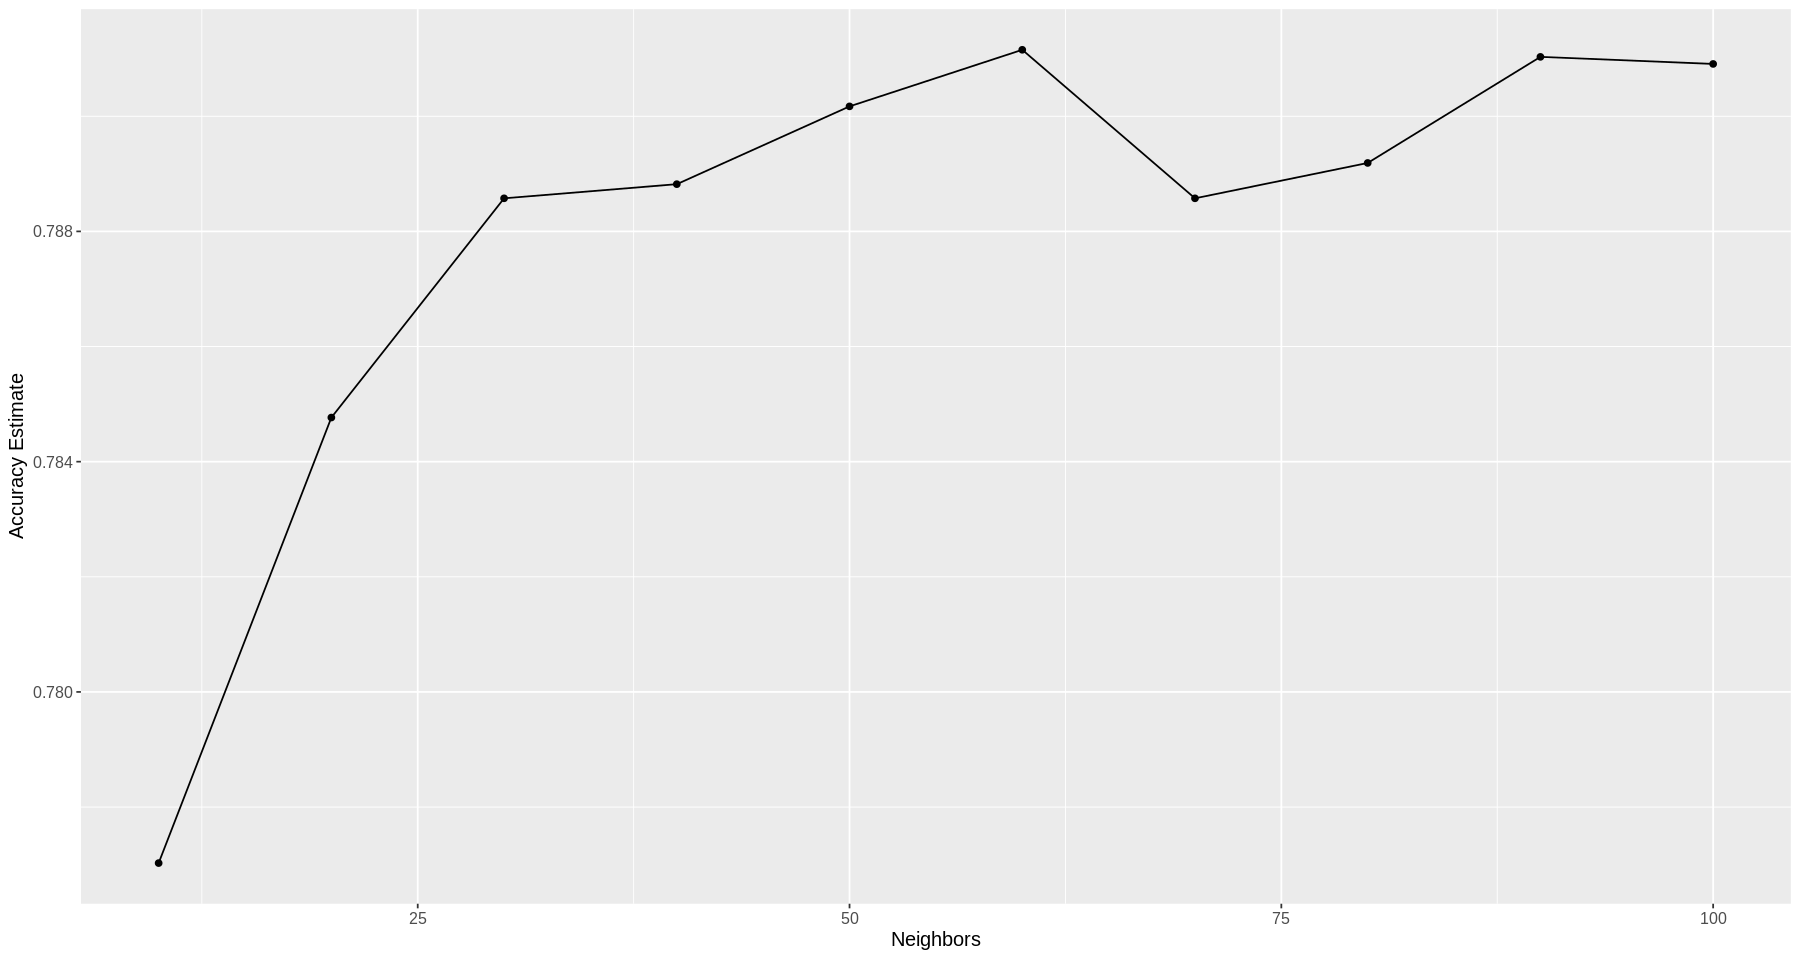

In [45]:
# KNN classification tuning(note no scaling is necessary due to our variables being percentage-wise)
tennis_recipe <- recipe(Outcome ~., data = tennis_train_final) 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
tennis_train_final_vfold <- vfold_cv(tennis_train_final, v = 5, strata = Outcome)

k_vals <- tibble(neighbors = seq(from = 100, to = 1000, by = 100))

knn_results <- workflow() %>%
  add_recipe(tennis_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = tennis_train_final_vfold, grid = k_vals) %>%
  collect_metrics() 
accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))

accuracy_vs_k
                            

In [58]:
# KNN classification predicting
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 300) %>% 
  set_engine("kknn") %>% 
  set_mode("classification")
tennis_fit <- workflow() %>%
  add_recipe(tennis_recipe) %>%
  add_model(knn_spec) %>%
  fit(tennis_train_final)
tennis_predict <- predict(tennis_fit, tennis_test_final)%>%
                             bind_cols(tennis_test_final)
tennis_metrics <- tennis_predict %>% metrics(truth=Outcome, estimate = .pred_class)
tennis_conf_mat <- tennis_predict %>%
                        conf_mat(truth = Outcome, estimate = .pred_class)      
tennis_metrics
tennis_conf_mat                        

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7821081
kap,binary,0.5641795


          Truth
Prediction    W    L
         W 1374  416
         L  322 1275

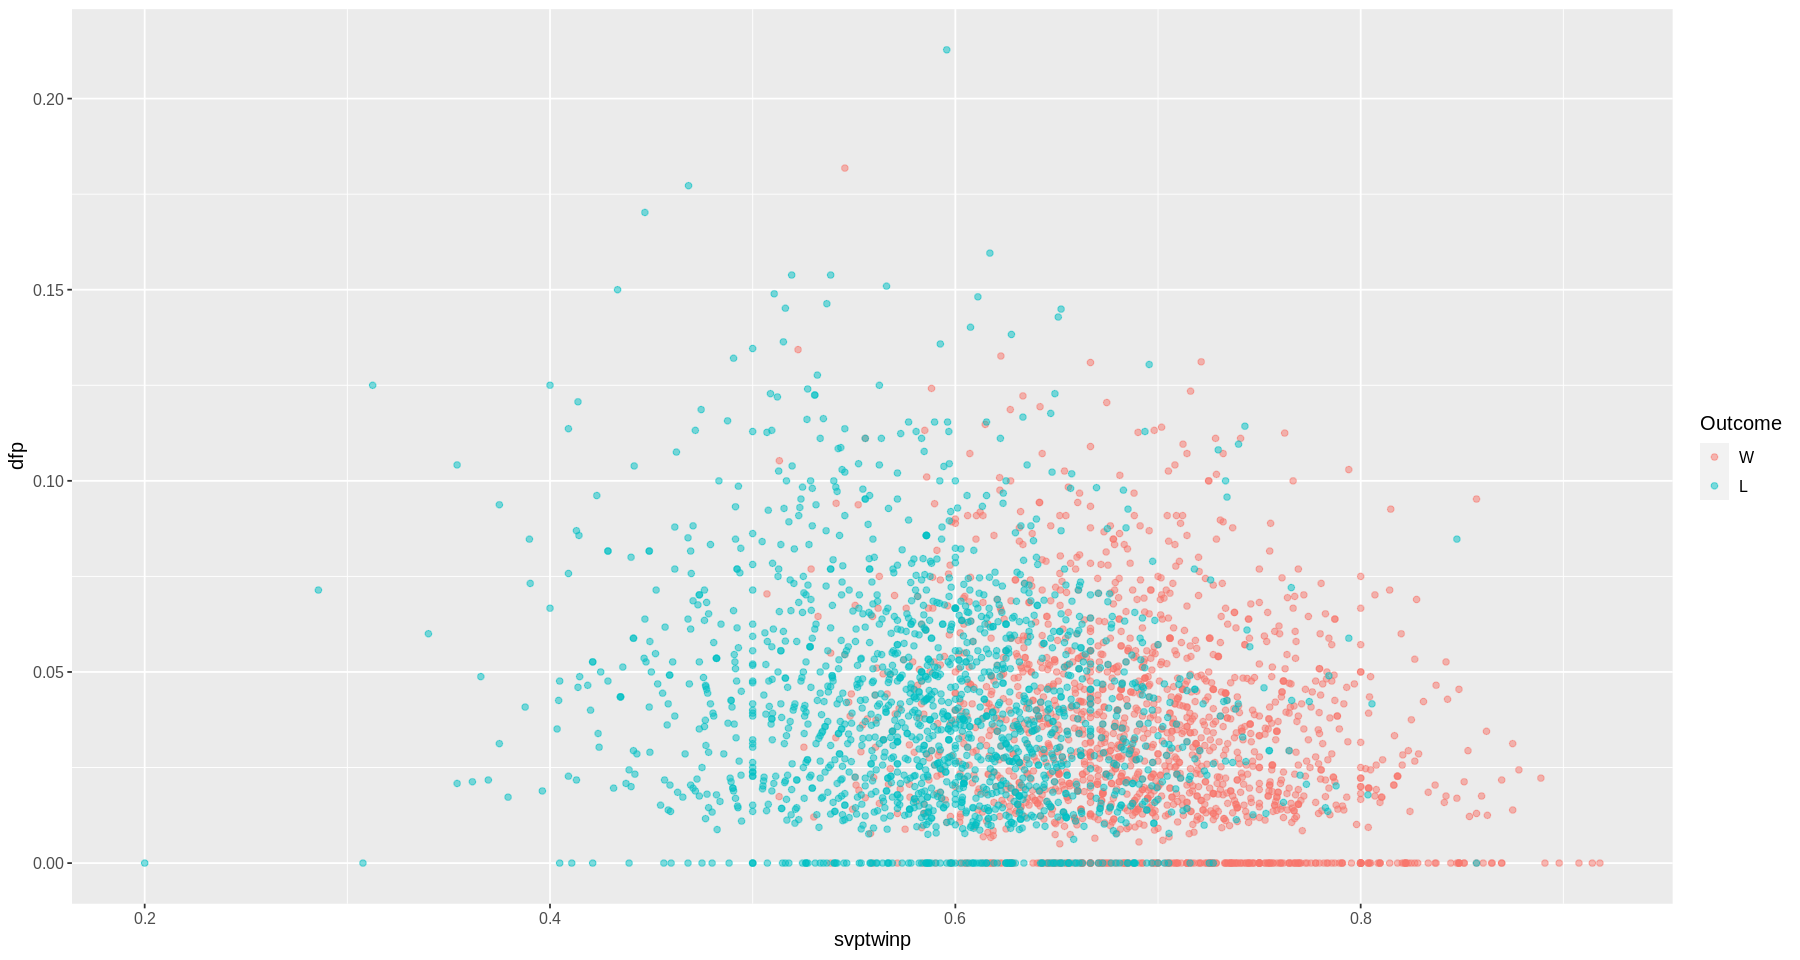

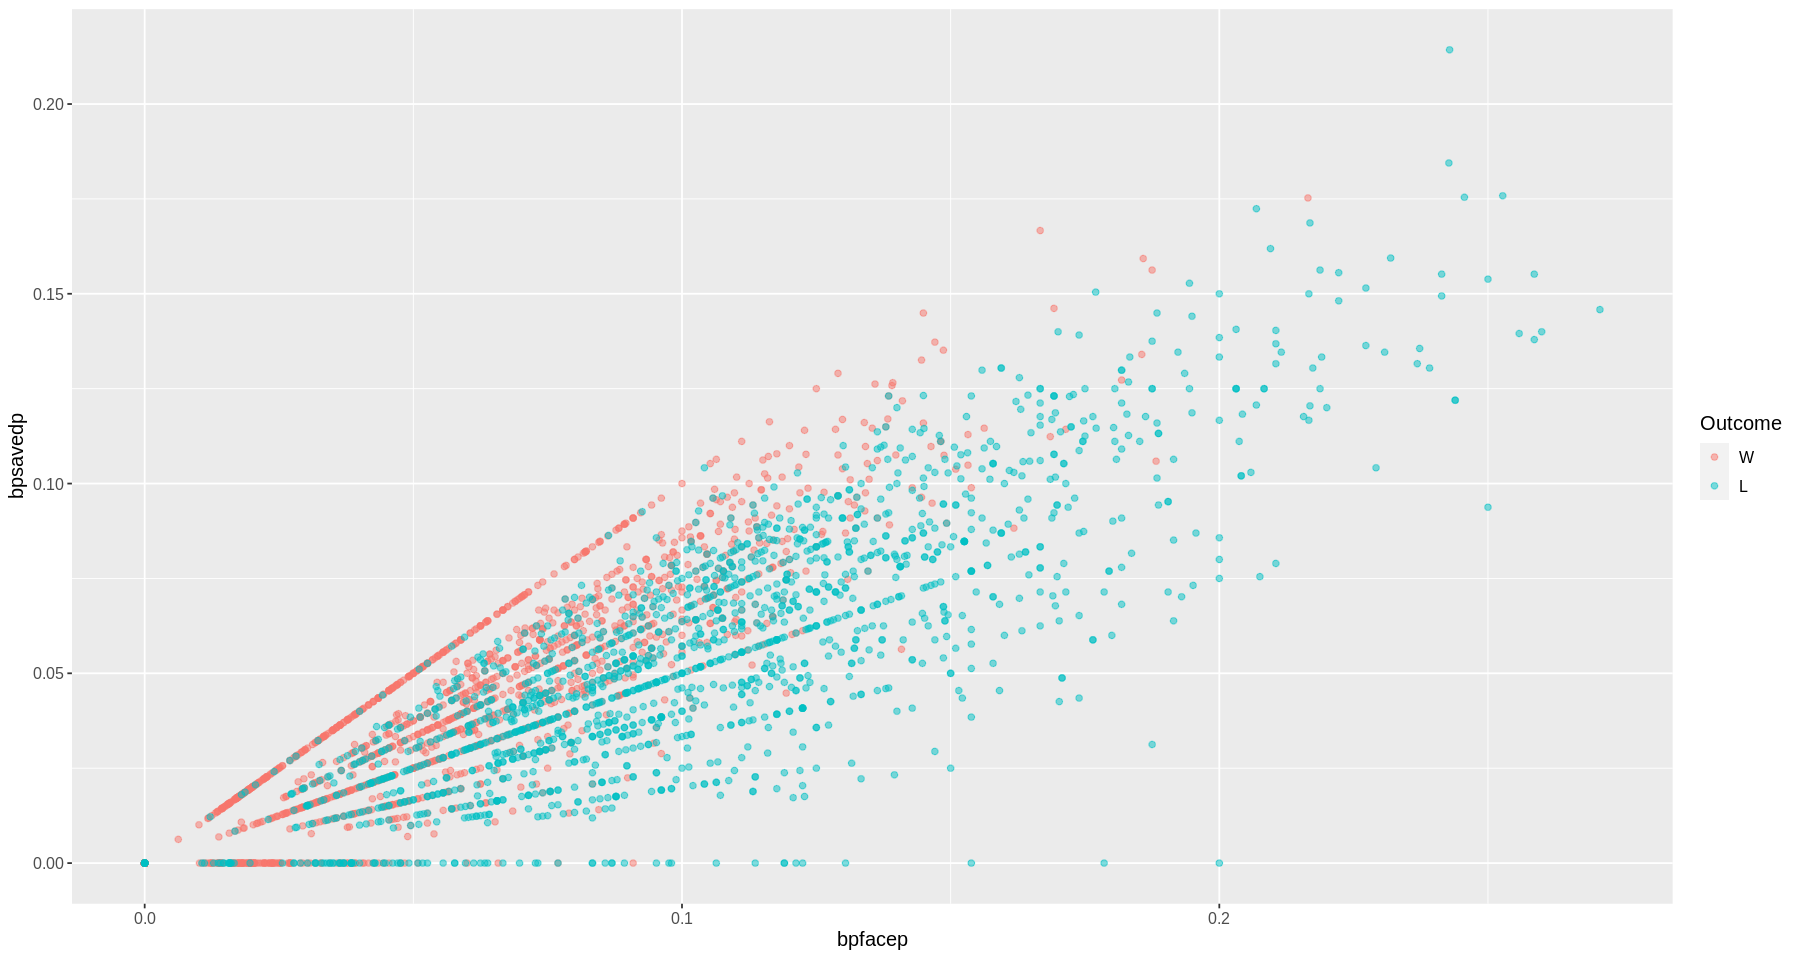

In [50]:
# visualization
# 2 graphs using different variables with importance to each other, serve category graph and break point category graph
serve_g <- tennis_predict %>%
  ggplot(aes(x = svptwinp, y = dfp, color = Outcome)) +
  geom_point(alpha = 0.5) +
  labs(x = "svptwinp", 
       y = "dfp",
       color = "Outcome") +
  theme(text = element_text(size = 12))
bp_g <- tennis_predict %>%
  ggplot(aes(x = bpfacep, y = bpsavedp, color = Outcome)) +
  geom_point(alpha = 0.5) +
  labs(x = "bpfacep", 
       y = "bpsavedp",
       color = "Outcome") +
  theme(text = element_text(size = 12))
serve_g
bp_g 
#maybe graph same 2 graphs again but with wrong preds only, top graph shows realtionship, bot graphs can show why pred is wrong

### DISCUSSION

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

FROM PROPOSAL:

We expect to find a correlation between match statistics and match outcome. For example, a player that has a high number of aces is more likely to win the match, and vice versa. 

This data analysis can have an impact on the training of tennis players. If certain match statistics are found to increase the chance of winning a match, players could focus on training those skills. Additionally, the data could also benefit audiences who participate in betting. Using previous match statistics or data from early matches, participants could more accurately place money on the winning player.  

**Future questions that could be investigated:**
- Could these predictions be used to find rank difference, winner rank and loser rank?
- Are certain match statistics more influential in the match outcome than others?

### REFERENCES
[1] https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn

[2] https://count.co/notebook/j0OYDOaWDmn

[3] De Seranno, A. (2020). Predicting Tennis Matches Using Machine Learning (dissertation). Ghent University, Ghent. 